In [134]:
%matplotlib inline

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
df_cust = pd.read_csv('/Users/Thrashmore/Downloads/Customer_data_itch.csv', encoding='utf-16', sep='\t', 
                      low_memory=False)
df_cust = df_cust[1:]

df_cust

,Owner ID,Owner Name,Customer Status,Most Recent Postcode,Owner Register Date,Cust First Order Date,Acquisition Channel,Acquisition Campaign,Acquisition Ad Group,Customer Churn Date,...,First Customer Active Date,First Wormer Date,First Treat Date,# Customers,# Pets,# Orders,Wormer Quant.,Wormer Price,Treats Quant.,Treats Price
1,486760,Kerry Miller,Trialist,L4 9SX,1/20/2021,1/20/2021,Untracked by GA,Untracked by GA,Untracked by GA,NaN,...,NaN,NaN,NaN,1,2,1,NaN,NaN,NaN,NaN
2,486759,Debra Matthews,Active,CF5 6AQ,1/20/2021,1/20/2021,Untracked by GA,Untracked by GA,Untracked by GA,NaN,...,1/20/2021,NaN,NaN,1,2,1,NaN,NaN,NaN,NaN
3,486752,Paula Butler,Trialist,SP1 3RE,1/20/2021,1/20/2021,Untracked by GA,Untracked by GA,Untracked by GA,NaN,...,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN
4,486748,Pam Aird,Active,OX14 5GU,1/20/2021,1/20/2021,Brand PPC,UK>>Search>>Brand,ITCH PET>>Exact,NaN,...,1/20/2021,1/20/2021,NaN,1,1,1,1,£4.96,NaN,NaN
5,486747,Faye Copeman,Active,HU8 0NG,1/20/2021,1/20/2021,Facebook,Broad - Static - CVN [P] - CBO Y,(not set),NaN,...,1/20/2021,1/20/2021,NaN,1,2,1,2,£4.92,NaN,NaN
6,486746,Seamus Burke,Trialist,NN2 8JD,1/20/2021,1/20/2021,Affiliates,(not set),(not set),NaN,...,NaN,NaN,NaN,1,2,1,NaN,NaN,NaN,NaN
7,486743,Abi Shaw,Trialist,NP7 6DE,1/20/2021,1/20/2021,Facebook,Broad - Static - CVN [P] - CBO Y,(not set),NaN,...,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN
8,486742,Lorraine Lister,Trialist,KY8 5EX,1/20/2021,1/20/2021,Generic PPC,UK>>Search>>Flea Treatments>>Generic,Best Flea Treatment,NaN,...,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN
9,486740,Anne Jones,Trialist,TF31sg,1/20/2021,1/20/2021,Brand PPC,UK>>Search>>Brand,ITCH PET>>Exact,NaN,...,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN
10,486736,April Layton,Active,PE28 4GT,1/20/2021,1/20/2021,Brand PPC,UK>>Search>>Brand,ITCH PET>>Exact,NaN,...,1/20/2021,1/20/2021,NaN,1,2,1,2,£4.92,NaN,NaN


In [3]:
df_cust.columns

Index(['Owner ID', 'Owner Name', 'Customer Status', 'Most Recent Postcode',
       'Owner Register Date', 'Cust First Order Date', 'Acquisition Channel',
       'Acquisition Campaign', 'Acquisition Ad Group', 'Customer Churn Date',
       'First Customer Trial Date', 'First Customer Active Date',
       'First Wormer Date', 'First Treat Date', '# Customers', '# Pets',
       '# Orders', 'Wormer Quant.', 'Wormer Price', 'Treats Quant.',
       'Treats Price'],
      dtype='object')

In [93]:
df_customer_cohort = df_cust[['Owner ID', 'Owner Name', 'First Customer Active Date']]
df_customer_cohort = df_customer_cohort.dropna(subset=['First Customer Active Date']).reset_index(drop=True)
df_customer_cohort['First Customer Active Date'] = pd.to_datetime(df_customer_cohort['First Customer Active Date'])
df_customer_cohort['customer_month_cohort'] = df_customer_cohort['First Customer Active Date'].dt.strftime('%Y-%m')
df_customer_cohort['customer_week_cohort'] = pd.to_datetime(df_customer_cohort['First Customer Active Date'], format='%Y%m%d').dt.strftime('%Y%W').astype(int)
df_customer_cohort = df_customer_cohort.drop(columns=['First Customer Active Date'])

df_customer_cohort

,Owner ID,Owner Name,customer_month_cohort,customer_week_cohort
0,486759,Debra Matthews,2021-01,202103
1,486748,Pam Aird,2021-01,202103
2,486747,Faye Copeman,2021-01,202103
3,486736,April Layton,2021-01,202103
4,486733,Louise Anderson,2021-01,202103
5,486728,Lawrence Craddock,2021-01,202103
6,486727,Erin Clemans,2021-01,202103
7,486721,Adele Cartwright,2021-01,202103
8,486711,Adie Venables,2021-01,202103
9,486709,Stephanie Critchley,2021-01,202103


In [95]:
df_cust1 = df_cust.dropna(subset=['First Customer Active Date'])
df_cust2 = pd.merge(df_cust1, df_customer_cohort, how='left', on=['Owner ID','Owner Name'])
df_cust2

,Owner ID,Owner Name,Customer Status,Most Recent Postcode,Owner Register Date,Cust First Order Date,Acquisition Channel,Acquisition Campaign,Acquisition Ad Group,Customer Churn Date,...,First Treat Date,# Customers,# Pets,# Orders,Wormer Quant.,Wormer Price,Treats Quant.,Treats Price,customer_month_cohort,customer_week_cohort
0,486759,Debra Matthews,Active,CF5 6AQ,1/20/2021,1/20/2021,Untracked by GA,Untracked by GA,Untracked by GA,NaN,...,NaN,1,2,1,NaN,NaN,NaN,NaN,2021-01,202103
1,486748,Pam Aird,Active,OX14 5GU,1/20/2021,1/20/2021,Brand PPC,UK>>Search>>Brand,ITCH PET>>Exact,NaN,...,NaN,1,1,1,1,£4.96,NaN,NaN,2021-01,202103
2,486747,Faye Copeman,Active,HU8 0NG,1/20/2021,1/20/2021,Facebook,Broad - Static - CVN [P] - CBO Y,(not set),NaN,...,NaN,1,2,1,2,£4.92,NaN,NaN,2021-01,202103
3,486736,April Layton,Active,PE28 4GT,1/20/2021,1/20/2021,Brand PPC,UK>>Search>>Brand,ITCH PET>>Exact,NaN,...,NaN,1,2,1,2,£4.92,NaN,NaN,2021-01,202103
4,486733,Louise Anderson,Active,B43 7EJ,1/19/2021,1/19/2021,Brand PPC,UK>>Search>>Brand>>Super Head,ITCH>>Exact,NaN,...,NaN,1,2,1,2,£4.92,NaN,NaN,2021-01,202103
5,486728,Lawrence Craddock,Active,SO40 9DN,1/19/2021,1/19/2021,Generic PPC,UK>>Search>>Brand,ITCH PET>>Exact,NaN,...,NaN,1,1,1,1,£2.46,NaN,NaN,2021-01,202103
6,486727,Erin Clemans,Active,M30 8DS,1/19/2021,1/19/2021,Direct,(not set),(not set),NaN,...,NaN,1,1,1,1,£2.46,NaN,NaN,2021-01,202103
7,486721,Adele Cartwright,Active,BL6 5NR,1/19/2021,1/19/2021,Facebook,TOF - Proven - Static - CVN [P] - CBO Y,(not set),NaN,...,NaN,1,2,1,NaN,NaN,NaN,NaN,2021-01,202103
8,486711,Adie Venables,Active,TQ12 4HX,1/19/2021,1/19/2021,Brand PPC,UK>>Search>>Brand,ITCH PET>>Exact,NaN,...,NaN,1,1,1,1,£2.46,NaN,NaN,2021-01,202103
9,486709,Stephanie Critchley,Active,LL77 7RP,1/19/2021,1/19/2021,Brand PPC,UK>>Search>>Brand,ITCH PET>>Exact,NaN,...,NaN,1,1,1,1,£2.46,NaN,NaN,2021-01,202103


In [118]:
df_cust2[df_cust2['Owner Name']=='Lisa Radford']

,Owner ID,Owner Name,Customer Status,Most Recent Postcode,Owner Register Date,Cust First Order Date,Acquisition Channel,Acquisition Campaign,Acquisition Ad Group,Customer Churn Date,...,First Treat Date,# Customers,# Pets,# Orders,Wormer Quant.,Wormer Price,Treats Quant.,Treats Price,customer_month_cohort,customer_week_cohort
127905,5239,Lisa Radford,Churned,BS13 8NE,8/7/2019,8/7/2019,Facebook,(not set),(not set),10/19/2019,...,NaN,1,2,2,NaN,NaN,NaN,NaN,2019-08,201933


In [8]:
df_pet = pd.read_csv('/Users/Thrashmore/Downloads/Pet_Data_itch.csv', encoding='utf-16', sep='\t', low_memory=False)
df_pet = df_pet[1:]
df_pet

,Owner ID,Owner Name,Owner Register Date,Customer Triallist Date,Customer Active Date,Pet ID,Pet Status,Pet Type,Pet Age,Conditions,...,First Wormer Date,First Treat Date,# Customers,# Pets,# Orders,Product Price,Wormer Quant.,Wormer Price,Treats Quant.,Treats Price
1,1704,Allison Smith,8/15/2019,NaN,8/15/2019,1849,Churned,Cat,11,anxiety & stress,...,8/15/2019,NaN,1,1,1,£9.45,1,£2.46,NaN,NaN
2,4684,Georgina Cardell,8/1/2019,8/1/2019,NaN,5739,Churned,Dog,8,NaN,...,NaN,NaN,1,1,1,£7.50,NaN,NaN,NaN,NaN
3,4684,Georgina Cardell,8/1/2019,8/1/2019,NaN,46597,Churned,Dog,8,skin lives with children under 4 or eats raw f...,...,NaN,NaN,1,1,1,£7.50,NaN,NaN,NaN,NaN
4,4684,Georgina Cardell,8/1/2019,8/1/2019,NaN,46601,Churned,Dog,18,skin lives with children under 4 or eats raw f...,...,NaN,NaN,1,1,1,£7.00,NaN,NaN,NaN,NaN
5,4684,Georgina Cardell,8/1/2019,8/1/2019,NaN,46620,Churned,Cat,3,NaN,...,NaN,NaN,1,1,0,NaN,NaN,NaN,NaN,NaN
6,4684,Georgina Cardell,8/1/2019,8/1/2019,NaN,46622,Churned,Cat,11,NaN,...,NaN,NaN,1,1,0,NaN,NaN,NaN,NaN,NaN
7,5136,Vikki Cotterill,8/5/2019,8/5/2019,9/10/2019,49772,Churned,Dog,2,NaN,...,NaN,NaN,1,1,14,£105.00,NaN,NaN,NaN,NaN
8,5239,Lisa Radford,8/7/2019,8/7/2019,8/20/2019,16857,Churned,Cat,8,lives with children under 4 or eats raw food o...,...,NaN,NaN,1,1,2,£13.00,NaN,NaN,NaN,NaN
9,5239,Lisa Radford,8/7/2019,8/7/2019,8/20/2019,16858,Churned,Cat,10,lives with children under 4 or eats raw food o...,...,NaN,NaN,1,1,2,£13.00,NaN,NaN,NaN,NaN
10,5977,Margaret Parker,8/2/2019,8/2/2019,10/2/2019,41763,Churned,Dog,5,lives with children under 4 or eats raw food o...,...,NaN,NaN,1,1,3,£24.00,NaN,NaN,NaN,NaN


In [9]:
df_pet.columns

Index(['Owner ID', 'Owner Name', 'Owner Register Date',
       'Customer Triallist Date', 'Customer Active Date', 'Pet ID',
       'Pet Status', 'Pet Type', 'Pet Age', 'Conditions ', 'hasfleas',
       'Pet Created Date', 'First Pet Order Date', 'Pet Churn Date',
       'Pet Triallist Date', 'Pet Active Date', 'First Wormer Date',
       'First Treat Date', '# Customers', '# Pets', '# Orders',
       'Product Price', 'Wormer Quant.', 'Wormer Price', 'Treats Quant.',
       'Treats Price'],
      dtype='object')

In [96]:
df_pet_cohort = df_pet[['Owner ID', 'Owner Name', 'Pet ID', 'Pet Active Date']]
df_pet_cohort = df_pet_cohort.dropna(subset=['Pet Active Date']).reset_index(drop=True)
df_pet_cohort['Pet Active Date'] = pd.to_datetime(df_pet_cohort['Pet Active Date'])
df_pet_cohort['pet_month_cohort'] = df_pet_cohort['Pet Active Date'].dt.strftime('%Y-%m')
df_pet_cohort['pet_week_cohort'] = pd.to_datetime(df_pet_cohort['Pet Active Date'], format='%Y%m%d').dt.strftime('%Y%W').astype(int)
df_pet_cohort = df_pet_cohort.drop(columns=['Pet Active Date'])

df_pet_cohort

,Owner ID,Owner Name,Pet ID,pet_month_cohort,pet_week_cohort
0,1704,Allison Smith,1849,2019-08,201932
1,5136,Vikki Cotterill,49772,2019-09,201936
2,5239,Lisa Radford,16857,2019-08,201933
3,5239,Lisa Radford,16858,2019-08,201933
4,5977,Margaret Parker,41763,2019-10,201939
5,6050,Aaron Sunnar,7793,2019-08,201931
6,6744,Nicola Bateman,48845,2019-09,201937
7,6744,Nicola Bateman,48846,2019-09,201937
8,6744,Nicola Bateman,48847,2019-09,201937
9,7398,Annette Angell,9789,2019-08,201930


In [97]:
df_pet1 = df_pet.dropna(subset=['Pet Active Date'])
df_pet2 = pd.merge(df_pet1, df_pet_cohort, how='left', on=['Owner ID','Owner Name', 'Pet ID'])
df_pet2

,Owner ID,Owner Name,Owner Register Date,Customer Triallist Date,Customer Active Date,Pet ID,Pet Status,Pet Type,Pet Age,Conditions,...,# Customers,# Pets,# Orders,Product Price,Wormer Quant.,Wormer Price,Treats Quant.,Treats Price,pet_month_cohort,pet_week_cohort
0,1704,Allison Smith,8/15/2019,NaN,8/15/2019,1849,Churned,Cat,11,anxiety & stress,...,1,1,1,£9.45,1,£2.46,NaN,NaN,2019-08,201932
1,5136,Vikki Cotterill,8/5/2019,8/5/2019,9/10/2019,49772,Churned,Dog,2,NaN,...,1,1,14,£105.00,NaN,NaN,NaN,NaN,2019-09,201936
2,5239,Lisa Radford,8/7/2019,8/7/2019,8/20/2019,16857,Churned,Cat,8,lives with children under 4 or eats raw food o...,...,1,1,2,£13.00,NaN,NaN,NaN,NaN,2019-08,201933
3,5239,Lisa Radford,8/7/2019,8/7/2019,8/20/2019,16858,Churned,Cat,10,lives with children under 4 or eats raw food o...,...,1,1,2,£13.00,NaN,NaN,NaN,NaN,2019-08,201933
4,5977,Margaret Parker,8/2/2019,8/2/2019,10/2/2019,41763,Churned,Dog,5,lives with children under 4 or eats raw food o...,...,1,1,3,£24.00,NaN,NaN,NaN,NaN,2019-10,201939
5,6050,Aaron Sunnar,8/7/2019,NaN,8/7/2019,7793,Churned,Cat,8,NaN,...,1,1,5,£59.05,3,£7.37,NaN,NaN,2019-08,201931
6,6744,Nicola Bateman,8/3/2019,8/3/2019,9/20/2019,48845,Churned,Dog,3,NaN,...,1,1,3,£21.00,NaN,NaN,NaN,NaN,2019-09,201937
7,6744,Nicola Bateman,8/3/2019,8/3/2019,9/20/2019,48846,Churned,Cat,14,NaN,...,1,1,3,£19.50,NaN,NaN,NaN,NaN,2019-09,201937
8,6744,Nicola Bateman,8/3/2019,8/3/2019,9/20/2019,48847,Churned,Cat,10,NaN,...,1,1,3,£19.50,NaN,NaN,NaN,NaN,2019-09,201937
9,7398,Annette Angell,8/1/2019,NaN,8/1/2019,9789,Churned,Cat,3,lives with children under 4 or eats raw food o...,...,1,1,3,£28.35,3,£7.37,NaN,NaN,2019-08,201930


In [98]:
df_cust2.columns

Index(['Owner ID', 'Owner Name', 'Customer Status', 'Most Recent Postcode',
       'Owner Register Date', 'Cust First Order Date', 'Acquisition Channel',
       'Acquisition Campaign', 'Acquisition Ad Group', 'Customer Churn Date',
       'First Customer Trial Date', 'First Customer Active Date',
       'First Wormer Date', 'First Treat Date', '# Customers', '# Pets',
       '# Orders', 'Wormer Quant.', 'Wormer Price', 'Treats Quant.',
       'Treats Price', 'customer_month_cohort', 'customer_week_cohort'],
      dtype='object')

In [99]:
df_pet2.columns

Index(['Owner ID', 'Owner Name', 'Owner Register Date',
       'Customer Triallist Date', 'Customer Active Date', 'Pet ID',
       'Pet Status', 'Pet Type', 'Pet Age', 'Conditions ', 'hasfleas',
       'Pet Created Date', 'First Pet Order Date', 'Pet Churn Date',
       'Pet Triallist Date', 'Pet Active Date', 'First Wormer Date',
       'First Treat Date', '# Customers', '# Pets', '# Orders',
       'Product Price', 'Wormer Quant.', 'Wormer Price', 'Treats Quant.',
       'Treats Price', 'pet_month_cohort', 'pet_week_cohort'],
      dtype='object')

In [119]:
df_account = pd.merge(df_cust2, df_pet2, how='inner', on=['Owner ID', 'Owner Name', 'Owner Register Date',
                                                    'First Wormer Date', 'First Treat Date', '# Customers', '# Pets',
                                                     '# Orders', 'Wormer Quant.', 'Wormer Price', 'Treats Quant.',
                                                     'Treats Price']).reset_index(drop=True)
df_account

,Owner ID,Owner Name,Customer Status,Most Recent Postcode,Owner Register Date,Cust First Order Date,Acquisition Channel,Acquisition Campaign,Acquisition Ad Group,Customer Churn Date,...,Conditions,hasfleas,Pet Created Date,First Pet Order Date,Pet Churn Date,Pet Triallist Date,Pet Active Date,Product Price,pet_month_cohort,pet_week_cohort
0,486748,Pam Aird,Active,OX14 5GU,1/20/2021,1/20/2021,Brand PPC,UK>>Search>>Brand,ITCH PET>>Exact,NaN,...,joints ears,False,1/20/2021,1/20/2021,NaN,NaN,1/20/2021,£25.35,2021-01,202103
1,486728,Lawrence Craddock,Active,SO40 9DN,1/19/2021,1/19/2021,Generic PPC,UK>>Search>>Brand,ITCH PET>>Exact,NaN,...,NaN,True,1/19/2021,1/19/2021,NaN,NaN,1/19/2021,£15.35,2021-01,202103
2,486727,Erin Clemans,Active,M30 8DS,1/19/2021,1/19/2021,Direct,(not set),(not set),NaN,...,NaN,False,1/19/2021,1/19/2021,NaN,NaN,1/19/2021,£15.35,2021-01,202103
3,486711,Adie Venables,Active,TQ12 4HX,1/19/2021,1/19/2021,Brand PPC,UK>>Search>>Brand,ITCH PET>>Exact,NaN,...,skin lives with children under 4 or eats raw f...,True,1/19/2021,1/19/2021,NaN,NaN,1/19/2021,£28.30,2021-01,202103
4,486709,Stephanie Critchley,Active,LL77 7RP,1/19/2021,1/19/2021,Brand PPC,UK>>Search>>Brand,ITCH PET>>Exact,NaN,...,hairball,NaN,1/19/2021,1/19/2021,NaN,NaN,1/19/2021,£15.35,2021-01,202103
5,486698,Emma Harrison-Kemp,Active,CF61 1TE,1/19/2021,1/19/2021,Generic PPC,UK>>Search>>Generic>>Solutions>>Phrase,Get Rid Of Fleas>>Cat,NaN,...,lives with children under 4 or eats raw food o...,True,1/19/2021,1/19/2021,NaN,NaN,1/19/2021,£34.90,2021-01,202103
6,486685,Tina Hill,Active,RG17 0LE,1/19/2021,1/19/2021,Facebook,TOF - Proven - Static - CVN [P] - CBO Y,(not set),NaN,...,NaN,False,1/19/2021,1/19/2021,NaN,NaN,1/19/2021,£32.30,2021-01,202103
7,486683,Catriona Brough,Active,KY14 6DH,1/19/2021,1/19/2021,Generic PPC,UK>>Search>>Worming Treatments>>Generic,Generic>>Worming Treatments>>Head>>Phrase,NaN,...,anxiety & stress dental digestion,NaN,1/19/2021,1/19/2021,NaN,NaN,1/19/2021,£41.65,2021-01,202103
8,486681,Ruby James,Active,M41 5DW,1/19/2021,1/19/2021,Generic PPC,UK>>Search>>Puppy Flea Treatments>>Exact,Puppy Flea Treatment,NaN,...,NaN,False,1/19/2021,1/19/2021,NaN,NaN,1/19/2021,£15.85,2021-01,202103
9,486673,Tracey Merryweather,Active,RG26 5QF,1/19/2021,1/19/2021,Other,Broad - Static - CVN [P] - CBO Y,(not set),NaN,...,NaN,False,1/19/2021,1/19/2021,NaN,NaN,1/19/2021,£15.35,2021-01,202103


In [120]:
df_account.columns

Index(['Owner ID', 'Owner Name', 'Customer Status', 'Most Recent Postcode',
       'Owner Register Date', 'Cust First Order Date', 'Acquisition Channel',
       'Acquisition Campaign', 'Acquisition Ad Group', 'Customer Churn Date',
       'First Customer Trial Date', 'First Customer Active Date',
       'First Wormer Date', 'First Treat Date', '# Customers', '# Pets',
       '# Orders', 'Wormer Quant.', 'Wormer Price', 'Treats Quant.',
       'Treats Price', 'customer_month_cohort', 'customer_week_cohort',
       'Customer Triallist Date', 'Customer Active Date', 'Pet ID',
       'Pet Status', 'Pet Type', 'Pet Age', 'Conditions ', 'hasfleas',
       'Pet Created Date', 'First Pet Order Date', 'Pet Churn Date',
       'Pet Triallist Date', 'Pet Active Date', 'Product Price',
       'pet_month_cohort', 'pet_week_cohort'],
      dtype='object')

In [121]:
df_account['Product Price'] = df_account['Product Price'].str[1:].astype(float).fillna(0)
df_account['Wormer Price'] = df_account['Wormer Price'].str[1:].astype(float).fillna(0)
df_account['Treats Price'] = df_account['Treats Price'].str[1:].astype(float).fillna(0)

df_account['revenue'] = df_account['Product Price']+df_account['Wormer Price']+df_account['Treats Price']
df_account.sort_values(by=['Owner ID'])

,Owner ID,Owner Name,Customer Status,Most Recent Postcode,Owner Register Date,Cust First Order Date,Acquisition Channel,Acquisition Campaign,Acquisition Ad Group,Customer Churn Date,...,hasfleas,Pet Created Date,First Pet Order Date,Pet Churn Date,Pet Triallist Date,Pet Active Date,Product Price,pet_month_cohort,pet_week_cohort,revenue
66416,100030,Caren Threlfall,Churned,BL1 7HZ,10/29/2019,10/29/2019,Facebook,(not set),(not set),1/29/2020,...,True,10/29/2019,10/29/2019,1/29/2020,10/29/2019,11/26/2019,26.00,2019-11,201947,26.00
66415,100048,Sarah Blockley,Churned,LE18 4XU,10/29/2019,10/29/2019,Direct,(not set),(not set),4/25/2020,...,True,10/29/2019,10/29/2019,4/25/2020,10/29/2019,11/25/2019,45.50,2019-11,201947,45.50
66414,100068,Sarah Starkey,Churned,SN3 3AP,10/29/2019,10/29/2019,Facebook,(not set),(not set),12/19/2019,...,True,10/29/2019,10/29/2019,12/19/2019,NaN,10/29/2019,18.90,2019-10,201943,23.82
66413,100076,Christine Massingham,Active,PO20 8RP,10/29/2019,10/29/2019,Direct,(not set),(not set),NaN,...,True,10/29/2019,10/29/2019,NaN,NaN,10/29/2019,115.20,2019-10,201943,120.12
66412,100088,Emma Andersson,Churned,N15 4QL,10/29/2019,10/29/2019,Direct,(not set),(not set),4/19/2020,...,True,10/29/2019,10/29/2019,4/19/2020,10/29/2019,11/25/2019,39.00,2019-11,201947,39.00
66411,100091,Jenni Medlock,Churned,GL6 0QQ,10/29/2019,10/29/2019,Facebook,(not set),(not set),11/26/2019,...,True,10/29/2019,10/29/2019,11/26/2019,NaN,10/29/2019,15.35,2019-10,201943,17.81
66410,100102,Dawn Morris,Churned,HR4 8SZ,10/29/2019,10/29/2019,Generic PPC,UK>>Search>>Generic>>Solutions>>Exact,How To Get Rid Of Fleas,6/26/2020,...,True,10/29/2019,10/29/2019,6/26/2020,NaN,10/29/2019,121.05,2019-10,201943,165.67
66409,100117,Clarice Heald,Churned,S62 6DW,10/29/2019,10/29/2019,Facebook,(not set),(not set),3/27/2020,...,True,10/29/2019,10/29/2019,3/27/2020,NaN,10/29/2019,47.25,2019-10,201943,59.54
66408,100129,Rhona Mcsherry,Churned,N10 2RT,10/29/2019,10/29/2019,Facebook,(not set),(not set),6/21/2020,...,True,10/29/2019,10/29/2019,6/21/2020,NaN,10/29/2019,66.15,2019-10,201943,83.36
66407,100146,Alice Fowler,Active,OL8 4AX,10/29/2019,10/29/2019,Facebook,(not set),(not set),NaN,...,True,10/29/2019,10/29/2019,NaN,10/29/2019,11/25/2019,97.50,2019-11,201947,97.50


In [130]:
month_cust = df_account.groupby('customer_month_cohort')['Owner ID', 'revenue'].agg({'Owner ID':'count','revenue':'sum'})
month_cust['revenue'] = month_cust.revenue.round(5)
month_cust = month_cust.rename(columns={'Owner ID':'customer_count', 'revenue':'monthly_revenue'}).reset_index()
month_cust

,customer_month_cohort,customer_count,monthly_revenue
0,2019-08,371,39197.32
1,2019-09,1618,139121.71
2,2019-10,2790,230940.44
3,2019-11,2798,234225.13
4,2019-12,2017,164401.56
5,2020-01,3159,296119.40
6,2020-02,4132,351522.07
7,2020-03,3907,313744.02
8,2020-04,6087,515371.24
9,2020-05,5990,431661.66


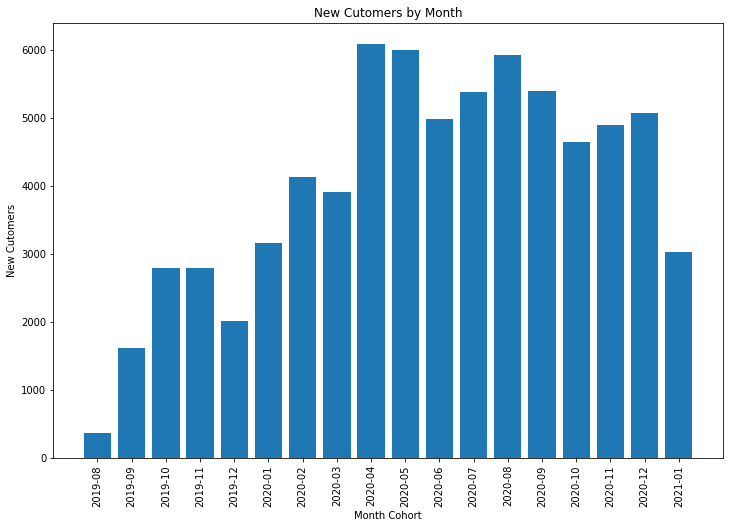

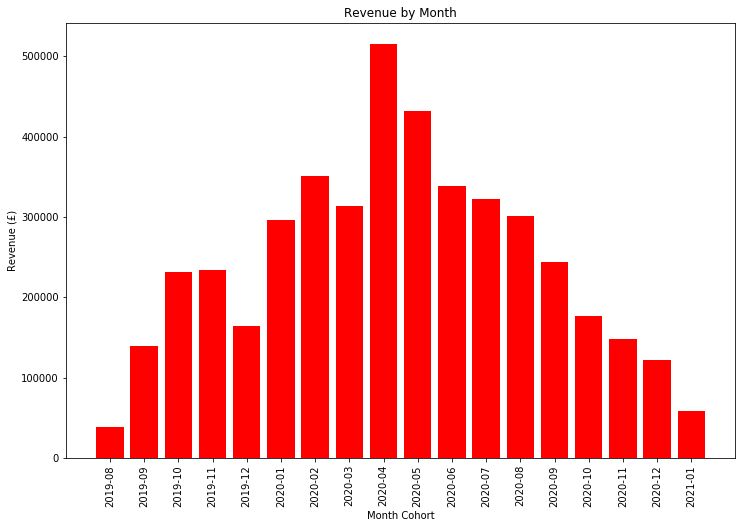

In [143]:
plt.bar(month_cust['customer_month_cohort'], month_cust['customer_count'])
plt.xticks(rotation=90)
plt.ylabel('New Cutomers')
plt.xlabel('Month Cohort')
plt.title('New Cutomers by Month')
plt.show()

plt.bar(month_cust['customer_month_cohort'], month_cust['monthly_revenue'], color='red')
plt.xticks(rotation=90)
plt.ylabel('Revenue (£)')
plt.xlabel('Month Cohort')
plt.title('Revenue by Month')
plt.show()

In [148]:
week_cust = df_account.groupby('customer_week_cohort')['Owner ID', 'revenue'].agg({'Owner ID':'count','revenue':'sum'})
week_cust['revenue'] = week_cust.revenue.round(5)
week_cust = week_cust.rename(columns={'Owner ID':'customer_count', 'revenue':'weekly_revenue'}).reset_index()
week_cust['customer_week_cohort'] = week_cust['customer_week_cohort'].astype(str)
week_cust

,customer_week_cohort,customer_count,weekly_revenue
0,201930,81,9179.73
1,201931,59,6809.10
2,201932,36,3079.08
3,201933,49,5666.61
4,201934,235,21633.78
5,201935,313,27204.26
6,201936,315,27764.45
7,201937,269,25898.21
8,201938,532,42823.33
9,201939,568,45447.96


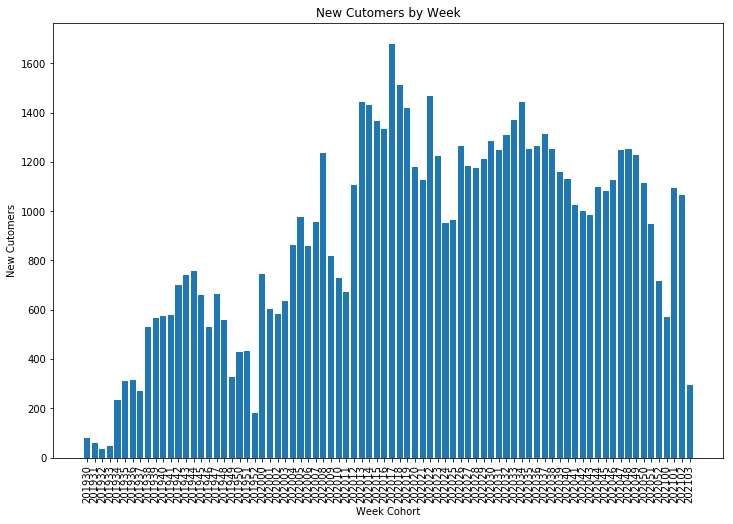

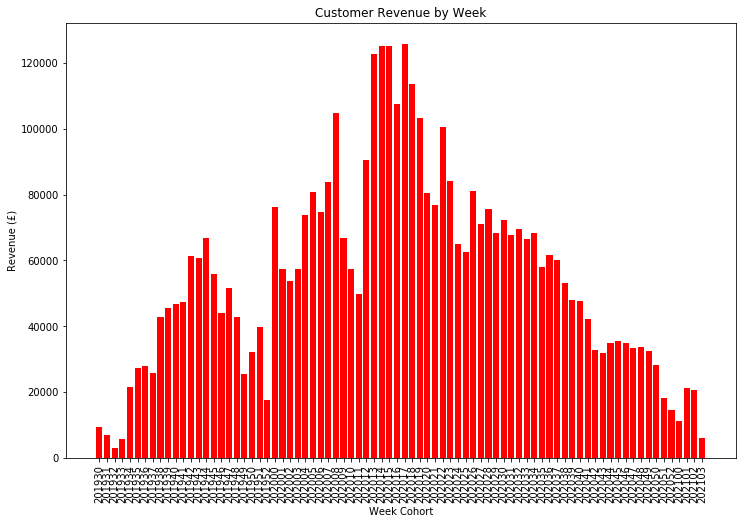

In [158]:
plt.bar(week_cust['customer_week_cohort'], week_cust['customer_count'])
plt.xticks(rotation=90)
plt.ylabel('New Cutomers')
plt.xlabel('Week Cohort')
plt.title('New Cutomers by Week')
plt.show()

plt.bar(week_cust['customer_week_cohort'], week_cust['weekly_revenue'], color='red')
plt.xticks(rotation=90)
plt.ylabel('Revenue (£)')
plt.xlabel('Week Cohort')
plt.title('Customer Revenue by Week')
plt.show()

In [153]:
month_pet = df_account.groupby('pet_month_cohort')['Pet ID', 'revenue'].agg({'Pet ID':'count','revenue':'sum'})
month_pet['revenue'] = month_pet.revenue.round(5)
month_pet = month_pet.rename(columns={'Pet ID':'pet_count', 'revenue':'monthly_revenue'}).reset_index()
month_pet

,pet_month_cohort,pet_count,monthly_revenue
0,2019-08,371,39197.32
1,2019-09,1618,139121.71
2,2019-10,2790,230940.44
3,2019-11,2798,234225.13
4,2019-12,2017,164401.56
5,2020-01,3159,296119.40
6,2020-02,4132,351522.07
7,2020-03,3907,313744.02
8,2020-04,6087,515371.24
9,2020-05,5990,431661.66


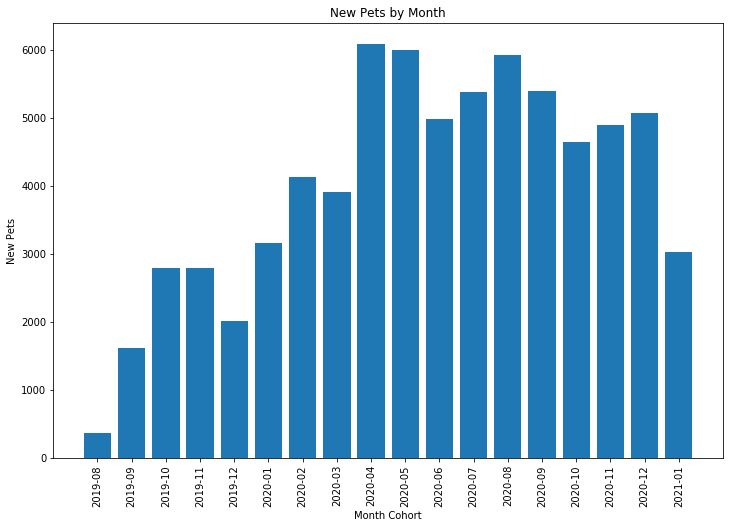

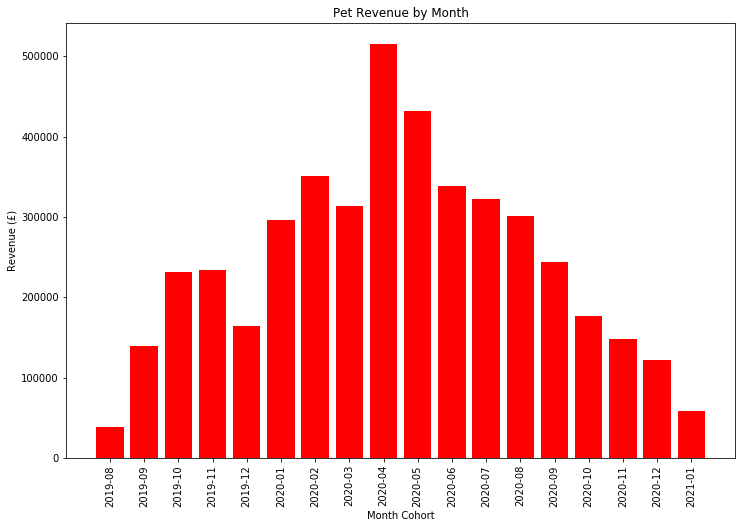

In [155]:
plt.bar(month_pet['pet_month_cohort'], month_pet['pet_count'])
plt.xticks(rotation=90)
plt.ylabel('New Pets')
plt.xlabel('Month Cohort')
plt.title('New Pets by Month')
plt.show()

plt.bar(month_pet['pet_month_cohort'], month_pet['monthly_revenue'], color='red')
plt.xticks(rotation=90)
plt.ylabel('Revenue (£)')
plt.xlabel('Month Cohort')
plt.title('Pet Revenue by Month')
plt.show()

In [157]:
week_pet = df_account.groupby('pet_week_cohort')['Pet ID', 'revenue'].agg({'Pet ID':'count','revenue':'sum'})
week_pet['revenue'] = week_pet.revenue.round(5)
week_pet = week_pet.rename(columns={'Pet ID':'pet_count', 'revenue':'weekly_revenue'}).reset_index()
week_pet['pet_week_cohort'] = week_pet['pet_week_cohort'].astype(str)
week_pet

,pet_week_cohort,pet_count,weekly_revenue
0,201930,81,9179.73
1,201931,59,6809.10
2,201932,36,3079.08
3,201933,49,5666.61
4,201934,235,21633.78
5,201935,313,27204.26
6,201936,315,27764.45
7,201937,269,25898.21
8,201938,532,42823.33
9,201939,568,45447.96


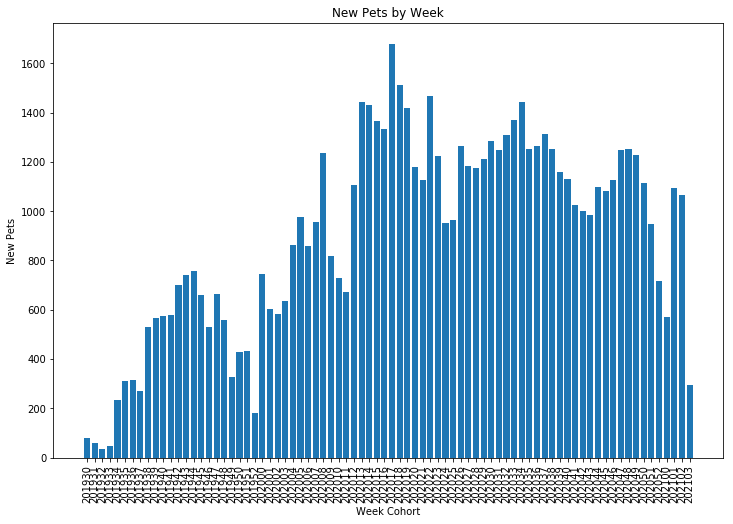

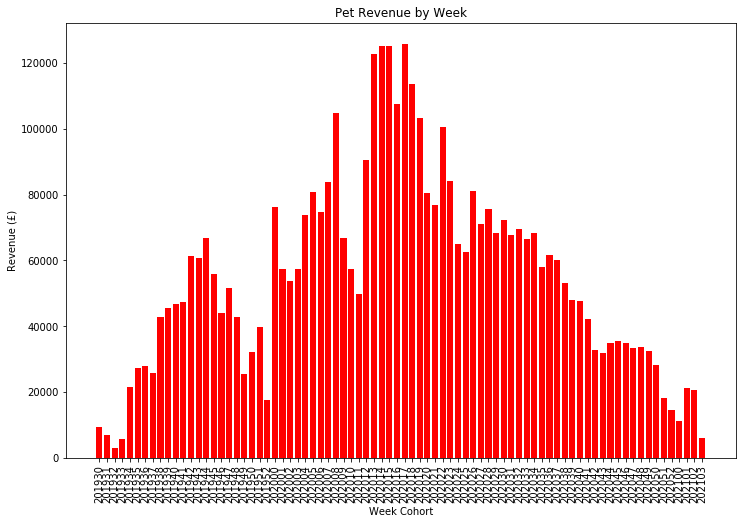

In [159]:
plt.bar(week_pet['pet_week_cohort'], week_pet['pet_count'])
plt.xticks(rotation=90)
plt.ylabel('New Pets')
plt.xlabel('Week Cohort')
plt.title('New Pets by Week')
plt.show()

plt.bar(week_pet['pet_week_cohort'], week_pet['weekly_revenue'], color='red')
plt.xticks(rotation=90)
plt.ylabel('Revenue (£)')
plt.xlabel('Week Cohort')
plt.title('Pet Revenue by Week')
plt.show()